In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [ ]:
 # Descargar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df = pd.read_csv('scopus1.csv')
df.head(300)

Authors  \
0    Santos H.; Shen K.; Mulvehill A.M.; Kejriwal M...   
1                      Cantini R.; Orsino A.; Talia D.   
2    Mensah J.A.; Nortey E.N.N.; Ocran E.; Iddi S.;...   
3    Yamada F.M.; Batagelo H.C.; Gois J.P.; Takahas...   
4                         Karani R.; Jani J.; Desai S.   
..                                                 ...   
295  Makhlouf Y.; Singh V.K.; Craig S.; McArdle A.;...   
296  Abdel-Basset M.; Mohamed R.; Alrashdi I.; Sall...   
297  Huang Z.; Yang K.; Tian H.; Wu H.; Tang S.; Cu...   
298                                      Alshahrani A.   
299  Putzier M.; Khakzad T.; Dreischarf M.; Thun S....   

                                     Author full names  \
0    Santos, Henrique (55575740500); Shen, Ke (5722...   
1    Cantini, Riccardo (57215871062); Orsino, Aless...   
2    Mensah, Joseph Agyapong (57219710912); Nortey,...   
3    Yamada, Fernanda Miyuki (57215344417); Batagel...   
4    Karani, Ruhina (55575225000); Jani, Jay (57224...   
..                                                 ...   
295  Makhlouf, Yasmine (57204570552); Singh, Vivek ...   
296  Abdel-Basset, Mohamed (57217514491); Mohamed, ...   
297  Huang, Zhibin (58062916200); Yang, Keen (57225...   
298                      Alshahrani, Ali (57190291747)   
299  Putzier, M. (7801553759); Khakzad, T. (5721932...   

                                          Author(s) ID  \
0    55575740500; 57221317073; 6506674893; 55588437...   
1                 57215871062; 57223995417; 7003506943   
2    57219710912; 35559307000; 57313527900; 5525060...   
3    57215344417; 10144705900; 22234000200; 5571165...   
4                55575225000; 57224439332; 56642308200   
..                                                 ...   
295  57204570552; 58593873000; 58944298500; 5875776...   
296  57217514491; 57216154465; 57208131178; 5718881...   
297  58062916200; 57225872346; 57204918318; 5720200...   
298                                        57190291747   
299  7801553759; 57219326069; 36097512600; 26535208...   

                                                 Title  \
0    A Theoretically Grounded Question Answering Da...   
1    Xai-driven knowledge distillation of large lan...   
2    De-occlusion and recognition of frontal face i...   
3    Generative approaches for solving tangram puzzles   
4    FER-BHARAT: a lightweight deep learning networ...   
..                                                 ...   
295  True-T – Improving T-cell response quantificat...   
296  CNN-IKOA: convolutional neural network with im...   
297  A validation of an entropy-based artificial in...   
298  Artificial intelligence technologies utilizati...   
299  Implementation of cloud computing in the Germa...   

                                          Source title  \
0                                    Data Intelligence   
1                                  Journal of Big Data   
2                                  Journal of Big Data   
3                     Discover Artificial Intelligence   
4                     Discover Artificial Intelligence   
..                                                 ...   
295  Computational and Structural Biotechnology Jou...   
296                                Journal of Big Data   
297        BMC Medical Informatics and Decision Making   
298  International Journal of Data and Network Science   
299                               npj Digital Medicine   

                                                  Link  \
0    https://www.scopus.com/inward/record.uri?eid=2...   
1    https://www.scopus.com/inward/record.uri?eid=2...   
2    https://www.scopus.com/inward/record.uri?eid=2...   
3    https://www.scopus.com/inward/record.uri?eid=2...   
4    https://www.scopus.com/inward/record.uri?eid=2...   
..                                                 ...   
295  https://www.scopus.com/inward/record.uri?eid=2...   
296  https://www.scopus.com/inward/record.uri?eid=2...   
297  https://www.scopus.com/inward/recor

In [1]:
grouped = df.groupby('Source title')['Title'].count()

top_grouped = grouped.head(1000)
plt.figure(figsize=(20, 10))
top_grouped.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Título de Fuente')
plt.ylabel('Número de Documentos')
plt.show()

NameError: name 'df' is not defined

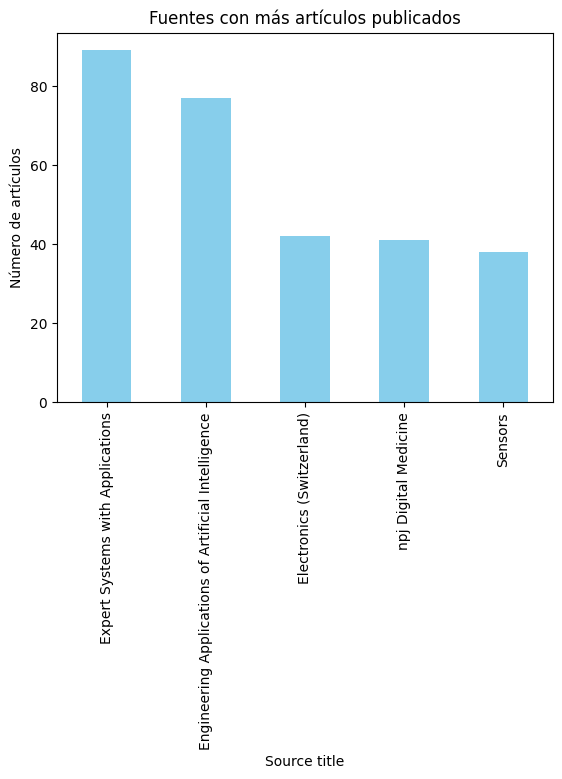

In [ ]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(5)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [ ]:

from nltk.stem import WordNetLemmatizer


# Descargar recursos necesarios de nltk (solo la primera vez)
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Crear una instancia del lematizador
lemmatizer = WordNetLemmatizer()

# Definir stopwords en inglés y agregar palabras adicionales
stop_words = set(stopwords.words('english'))
additional_stopwords = {'using', 'study', 'image', 'cancer', 'method','medical','healthcare'}
stop_words.update(additional_stopwords)

# Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar puntuación
    words = [word for word in text.split() if word not in stop_words]  # Eliminar stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lematizar las palabras
    return ' '.join(words)  # Unir palabras

# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

# Generar la nube de palabras, excluyendo las stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)





[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

Word  Frequency  Rank
0     artificial        632   1.0
1   intelligence        580   2.0
2       learning        548   3.0
3          model        333   4.0
4             ai        315   5.0
5         system        308   6.0
6          based        292   7.0
7        network        248   8.0
8        machine        225   9.0
9           deep        225   9.0
10        review        209  10.0
11   application        197  11.0
12     detection        194  12.0
13      approach        181  13.0
14      analysis        179  14.0
15          data        171  15.0
16    prediction        157  16.0
17        neural        140  17.0
18     algorithm        140  17.0
19  optimization        118  18.0

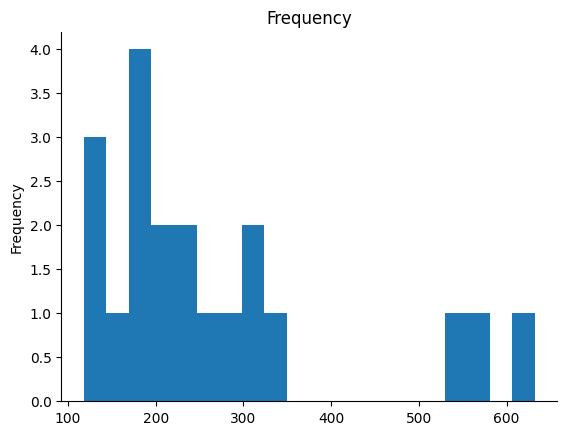

In [ ]:
from matplotlib import pyplot as plt
_df_0['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

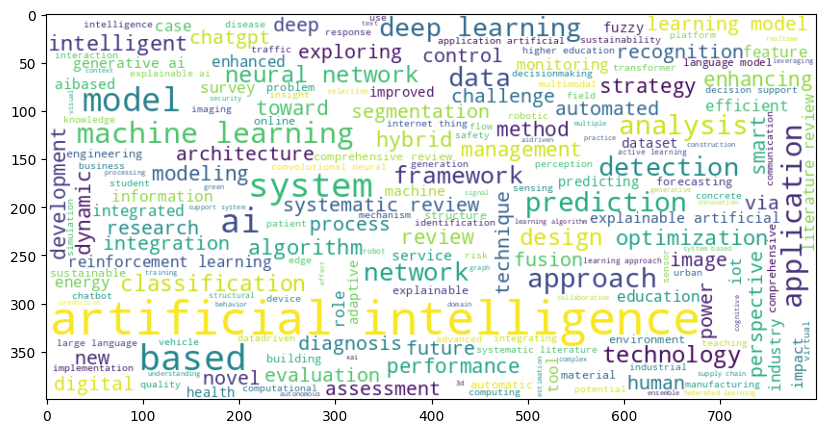

In [ ]:


# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

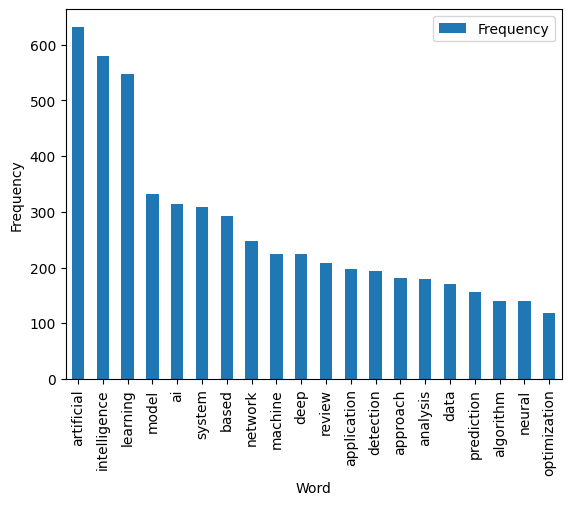

In [ ]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(20).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-36-5492a4065ecb>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


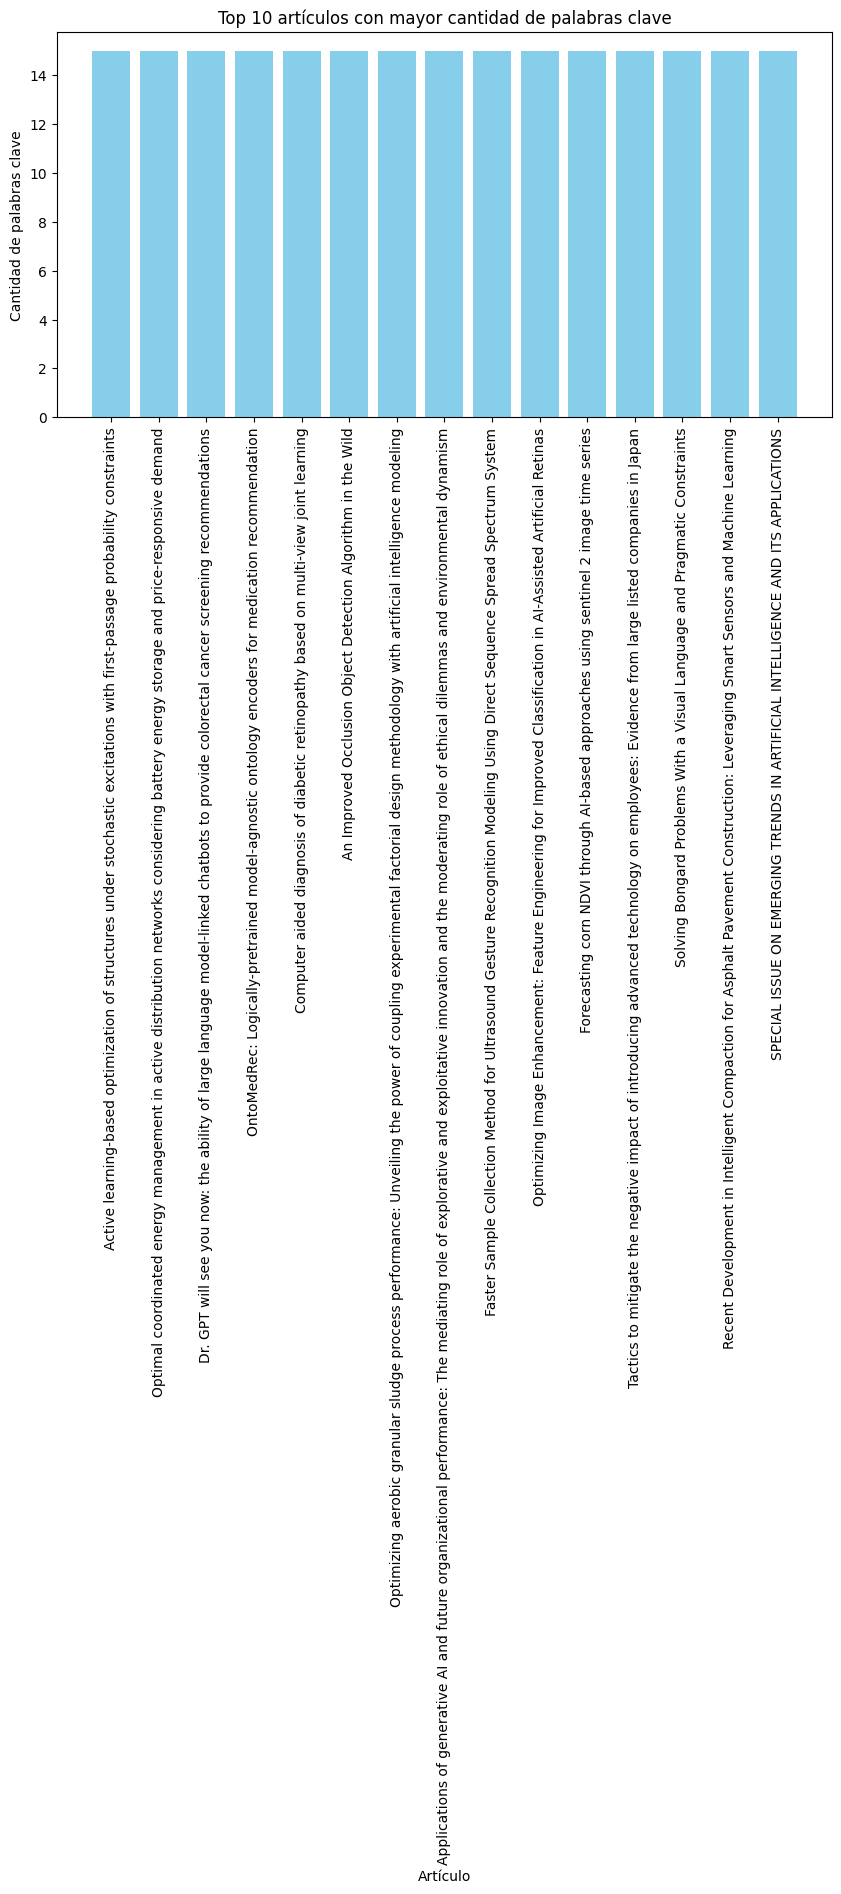

In [ ]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [ ]:

#ANALIZAR ABSTRACTS
# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(100)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")

Resumen 1:
We propose a novel benchmark, called Theoretically Grounded common sense Reasoning (TG-CSR), modeled as a set of question answering instances, with each instance grounded in a semantic category of common sense, such as space, time, and emotions. Achieving machine common sense has been a longstanding problem within Artificial Intelligence. Thus far, benchmark data sets that are grounded in a theory of common sense and can be used to conduct rigorous, semantic evaluations of common sense reasoning (CSR) systems have been lacking.

Resumen 2:
When the fan speed was varied according to the real-time detection method, the PM2.5 concentration in the cooking period was 16.5 % lower, with only a 3.7 % rise in fan power and a 0.8 % rise in daily heating demand, compared to using a constant fan speed. To ensure a healthy and comfortable indoor environment while avoiding unnecessary energy use, this research proposes an approach for detecting equipment usage. A Faster RCNN model was em

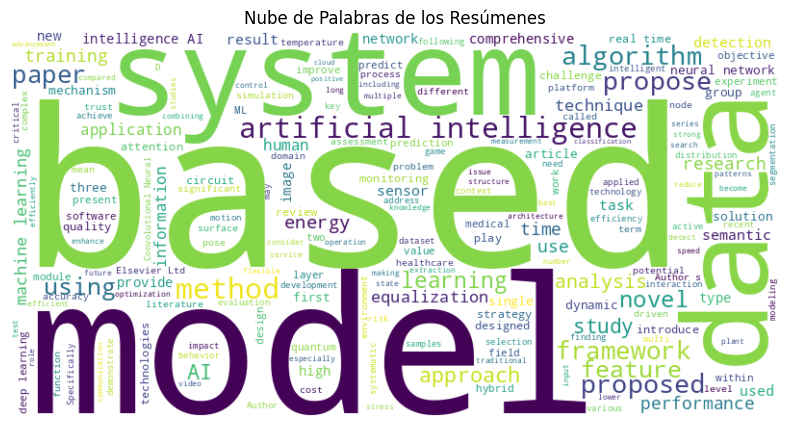

In [ ]:
dtext = ' '.join(top_abstracts_summary)

# Graficar la nube de palabras de los resúmenes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(dtext)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Resúmenes')
plt.show()

In [ ]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:1]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")

Title: A Theoretically Grounded Question Answering Data Set for Evaluating Machine Common Sense
Summary: We propose a novel benchmark, called Theoretically Grounded common sense Reasoning (TG-CSR), modeled as a set of question answering instances, with each instance grounded in a semantic category of common sense, such as space, time, and emotions.

Title: DeepVision based detection for energy-efficiency and indoor air quality enhancement in highly polluted spaces
Summary: When the fan speed was varied according to the real-time detection method, the PM2.5 concentration in the cooking period was 16.5 % lower, with only a 3.7 % rise in fan power and a 0.8 % rise in daily heating demand, compared to using a constant fan speed.

Title: AutoML-based predictive framework for predictive analysis in adsorption cooling and desalination systems
Summary: A total of 1769 simulated data points containing data indicating a failure status are applied to develop a comprehensive AI-based Diagnostic (A

In [ ]:
print(df.columns)



Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Source title',
       'Link', 'Abstract', 'Index Keywords', 'clean_title', 'keyword_count'],
      dtype='object')


In [ ]:

# Aplicar la limpieza de texto a los nombres de los autores
df['clean_authors'] = df['Authors'].apply(clean_text)

# Inicializar un contador
author_counts = Counter()

# Separar autores por delimitador y contar apariciones
df['clean_authors'].str.split(',').apply(lambda authors: author_counts.update([author.strip() for author in authors if author]))

# Crear un DataFrame a partir del contador de autores
author_df = pd.DataFrame(author_counts.items(), columns=['Author', 'Frequency'])

# Ordenar los autores por frecuencia de aparición, de mayor a menor
author_df = author_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
author_df['Rank'] = author_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de autores ordenados por rango
print(author_df.head(20))


                                               Author  Frequency  Rank
0                                             kaur j.          4   1.0
1                            quintián h.; corchado e.          4   1.0
2                                           shafik w.          3   2.0
3   koziel s.; pietrenko-dabrowska a.; wojcikowski...          2   3.0
4                                             wang y.          2   3.0
5                                        del campo m.          2   3.0
6                                           walter y.          2   3.0
7                                         bajorath j.          2   3.0
8                                          darwish d.          2   3.0
9                             mitrai i.; daoutidis p.          2   3.0
10                      ahmed s.; zaki a.; bentley y.          2   3.0
11                                         kshetri n.          2   3.0
12                                      nie h.; lu s.          2   3.0
13    